# Customer Churn Prediction

Objective:
Develop a machine learning model to predict customer churn based on historical customer data. You 
will follow a typical machine learning project pipeline, from data preprocessing to model deployment.

In [1]:
#impoting the Required Libs
#pandas libs use to do work on datasets perform some ops like analiyzing,cleaning,imputing the data's
import pandas as pd
#numpy lib are used to perform mathematical operations and mainly deals with array
import numpy as np
#matplotlib is used for ploting and to visulize the data
import matplotlib.pyplot as plt
 #seaborn libs are used for different kind of plots with color full visualization init
import seaborn as sns

# Exploratory Data Analysis (EDA)

In [2]:
#Reading the Customer churn 
df=pd.read_excel('customer_churn_large_dataset.xlsx')
#displaying the first 5 data from the Customer churn Data frame
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# About the Data Set

In [3]:
#size of data sets

df.shape

(100000, 9)

* From Above I Found 9 variables and 100000 observations in the Dataset

# About the Features

In [4]:
#finding the data types of all variables present in the data frame

df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

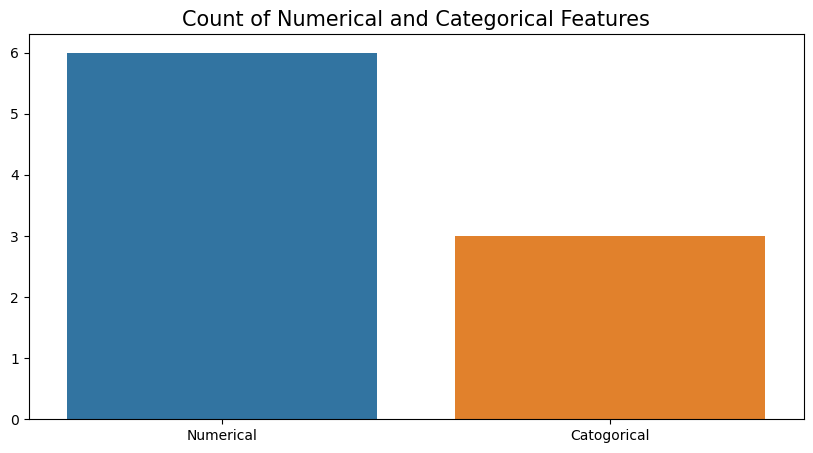

In [8]:
#ploting the number of catogorical variable and numerical variables
plt.figure(figsize=(10,5))
sns.barplot(x = ['Numerical','Catogorical'],y=[len(Numerical),len(Categorical)])
plt.title('Count of Numerical and Categorical Features',fontsize=15)
plt.show()

* Above Information shows the Data type of the each variables,there are 6 numerical and 3 categorical cariables

# Categorical variables

In [6]:
print('Categorical Features Includes : ')
print()
Categorical = []
for i in df.select_dtypes(include=['object']).columns:
    print(i)
    Categorical.append(i)

Categorical Features Includes : 

Name
Gender
Location


# Numerical Features

In [7]:
print('Numerical Features Includes: ')
print()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Numerical = []
for i in df.select_dtypes(include=numerics).columns:
    print(i)
    Numerical.append(i)

Numerical Features Includes: 

CustomerID
Age
Subscription_Length_Months
Monthly_Bill
Total_Usage_GB
Churn


# Missing Values in the Data Set

In [9]:
# finding null values which is present in the Dataset

df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

* Above Information states that there are no null values present in the Data set

# Visualization of Missing Values

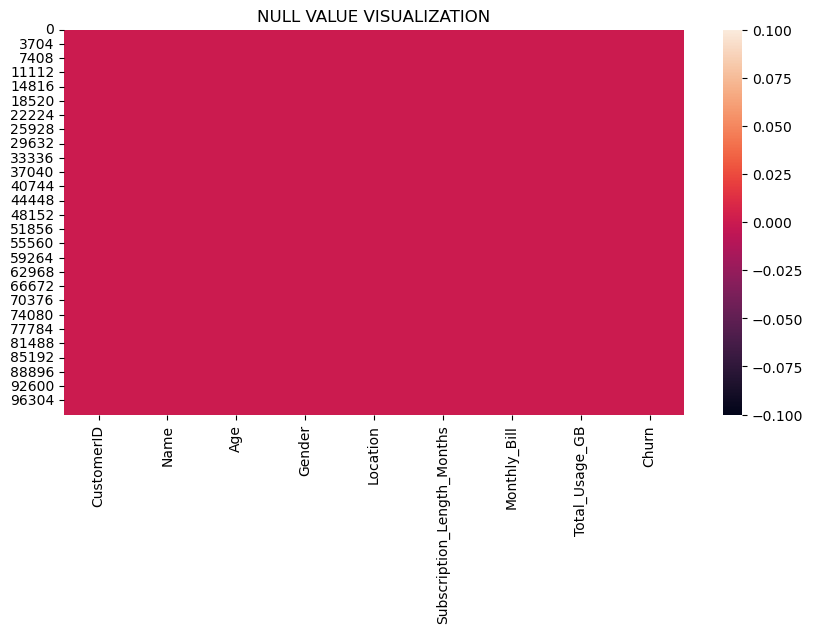

In [10]:
#ploting the heat map to find null values we already know that there are no null values present in the dataset 
plt.figure(figsize=(10,5))
plt.title('NULL VALUE VISUALIZATION')
sns.heatmap(df.isnull())
plt.show()

* Heat map also states that there are no null values present in all those Variables

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


# Finding Duplicates

In [12]:
df.duplicated().sum()

0

* There is no Duplicate records present in the Dataset

# Univariate Analysis For Categorical Variables

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
def countplot_CV(df,col):
    plt.figure(figsize=(15,6),facecolor='lightgrey')
    plt.suptitle(col,fontsize=15)
    axes=plt.axes()
    axes.set_facecolor('lightgrey')
    a=sns.countplot(df[col],hue=None,ax=axes)
    for label in a.containers:
        a.bar_label(label)
    plt.show()

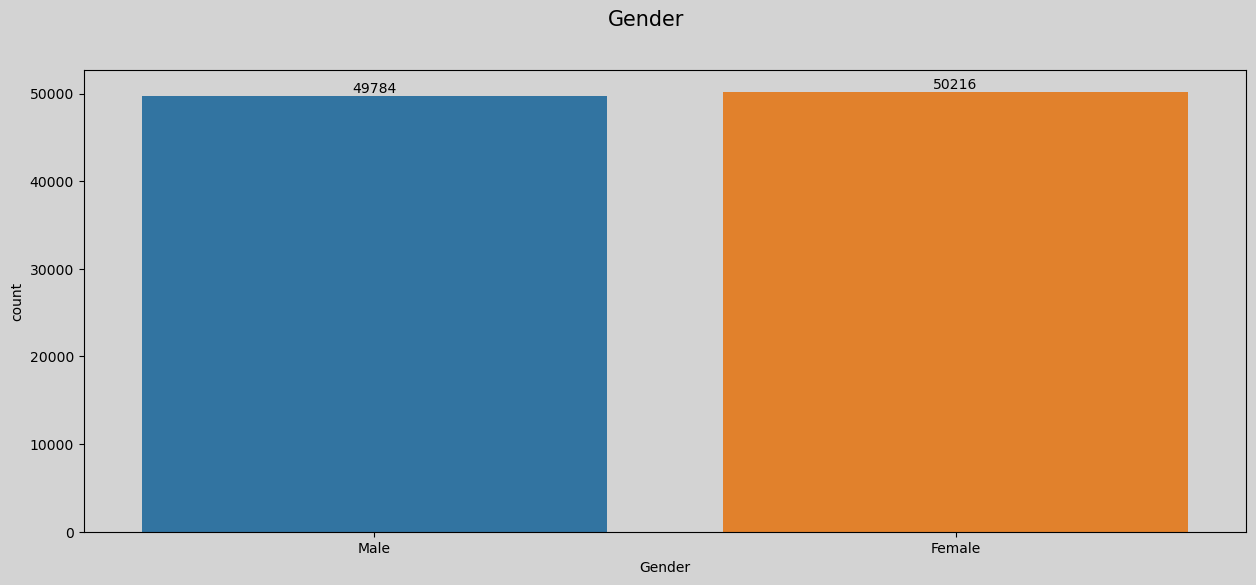

In [15]:
countplot_CV(df,'Gender')

In [16]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

* There are 49784 male data's and 50216 female data's present in the dataframe

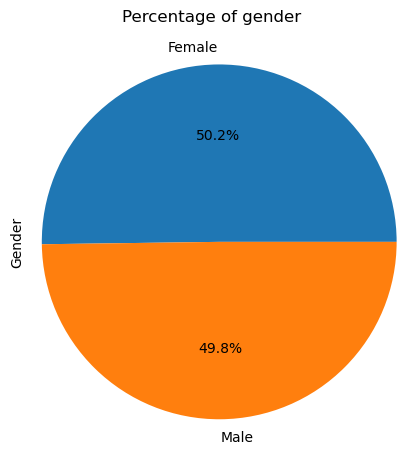

In [17]:
plt.suptitle('Percentage of gender')
df.groupby('Gender')['Gender'].count().plot.pie(autopct="%1.1f%%",radius=1.2);

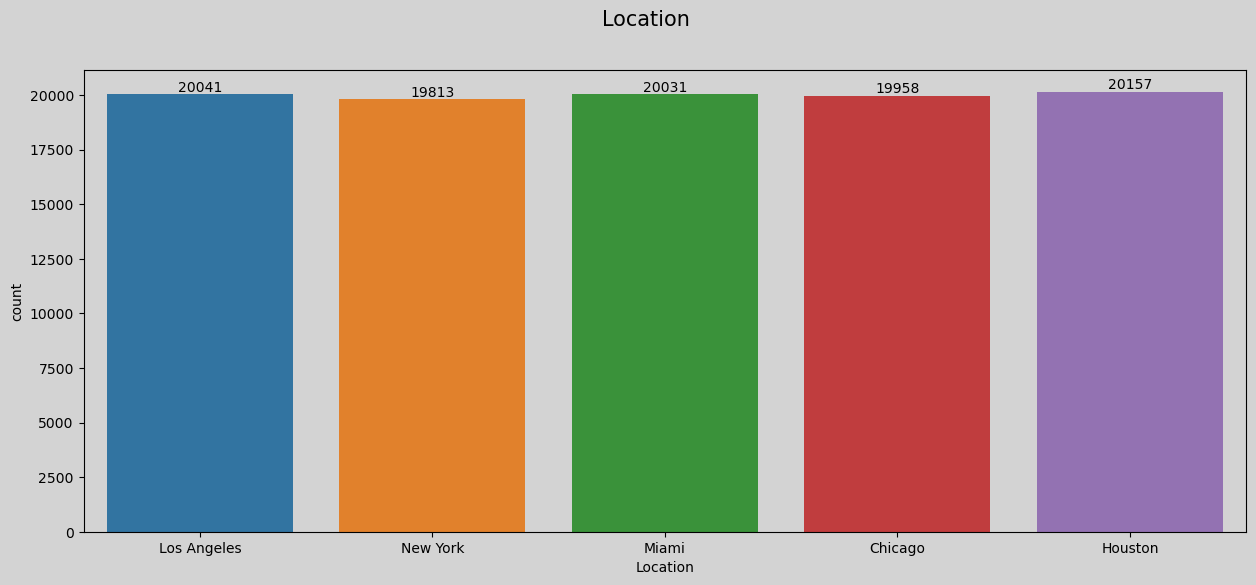

In [18]:
countplot_CV(df,'Location')

In [19]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

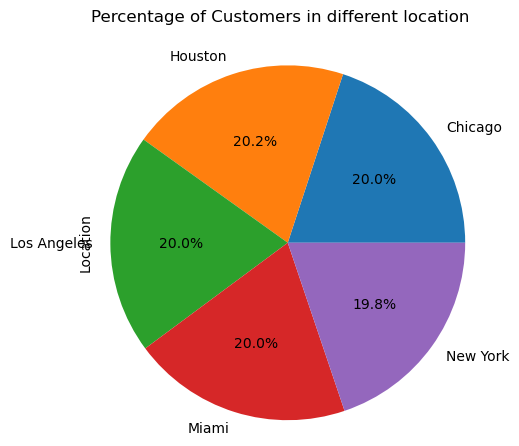

In [20]:
plt.suptitle('Percentage of Customers in different location')
df.groupby('Location')['Location'].count().plot.pie(autopct="%1.1f%%",radius=1.2);

# Univariant Analysis for Numerical Features

In [21]:
def ploting_numerical_features(df,x,c):
    plt.figure(figsize=(15,5),facecolor='lightgrey')

    plt.suptitle(x,fontsize=16)
    plt.subplot(1,3,1)
    sns.histplot(df[x],color=c)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,y=x,color=c)
    plt.subplot(1,3,3)
    sns.kdeplot(df[x],color=c);

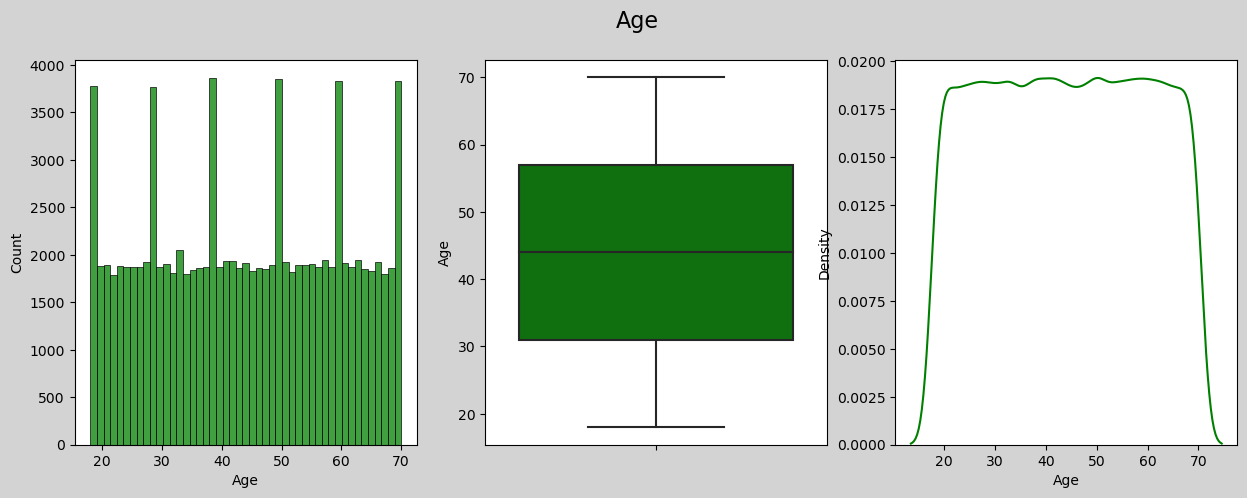

In [22]:
ploting_numerical_features(df,'Age','green')

In [23]:
a=pd.DataFrame(df.Age.value_counts().sort_index()).style.background_gradient('magma_r')
a

,Age
18,1839
19,1941
20,1886
21,1897
22,1787
23,1887
24,1876
25,1871
26,1874
27,1924


In [24]:
df['Age'].describe()

count    100000.000000
mean         44.027020
std          15.280283
min          18.000000
25%          31.000000
50%          44.000000
75%          57.000000
max          70.000000
Name: Age, dtype: float64

In [25]:
df['Age'].mode()

0    33
Name: Age, dtype: int64

* Above Information We can say that data's are Positively skewed / right skewed

* We can observe that Minmum Customer's age is 18 years 
* Maximum Customer's age is 70 years

In [26]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

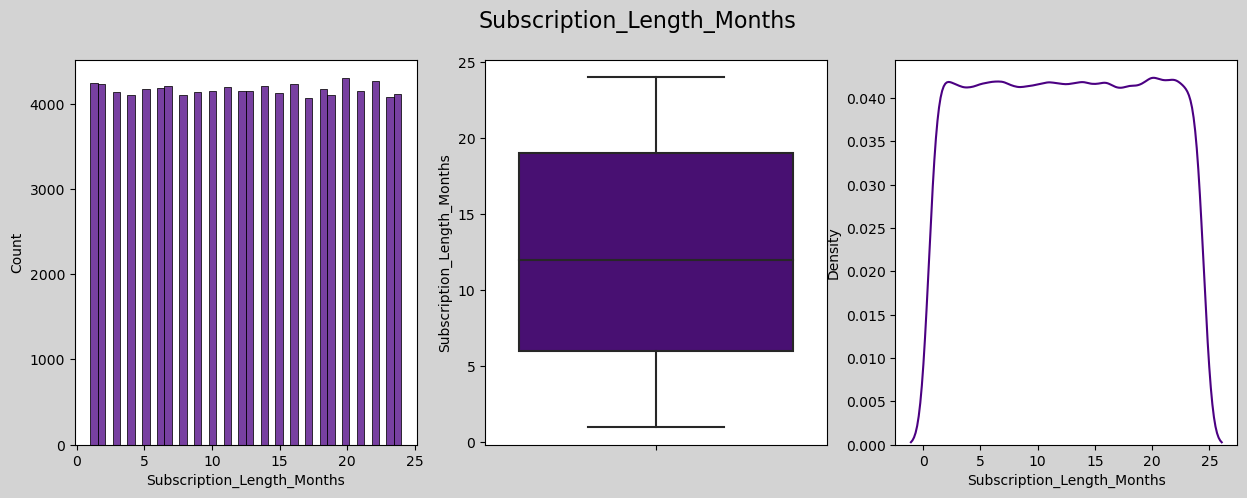

In [27]:
ploting_numerical_features(df,'Subscription_Length_Months','indigo')

In [28]:
df['Subscription_Length_Months'].value_counts().sort_index()

1     4247
2     4228
3     4136
4     4098
5     4171
6     4184
7     4211
8     4106
9     4134
10    4151
11    4200
12    4155
13    4154
14    4213
15    4122
16    4229
17    4064
18    4171
19    4106
20    4303
21    4154
22    4267
23    4083
24    4113
Name: Subscription_Length_Months, dtype: int64

In [29]:
df['Subscription_Length_Months'].describe()

count    100000.000000
mean         12.490100
std           6.926461
min           1.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          24.000000
Name: Subscription_Length_Months, dtype: float64

In [30]:
df['Subscription_Length_Months'].mode()

0    20
Name: Subscription_Length_Months, dtype: int64

* From Above Information We can say that data's are Distributed towards Rightside (Positively Skewed)

* Minimum Subscription Length is 1 month 
* Maximum Subscription length is 24 month
* Average Subscription Length is for 12 Months

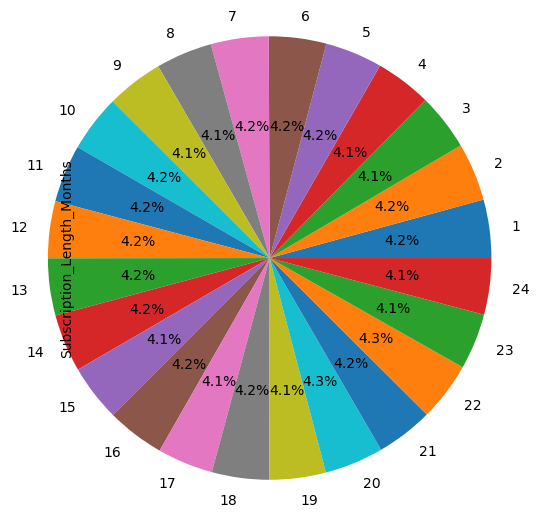

In [31]:
df.groupby('Subscription_Length_Months')['Subscription_Length_Months'].count().plot.pie(autopct="%1.1f%%",radius=1.5);

* Percentage of Customer Subscription length is almost same in all months

In [32]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

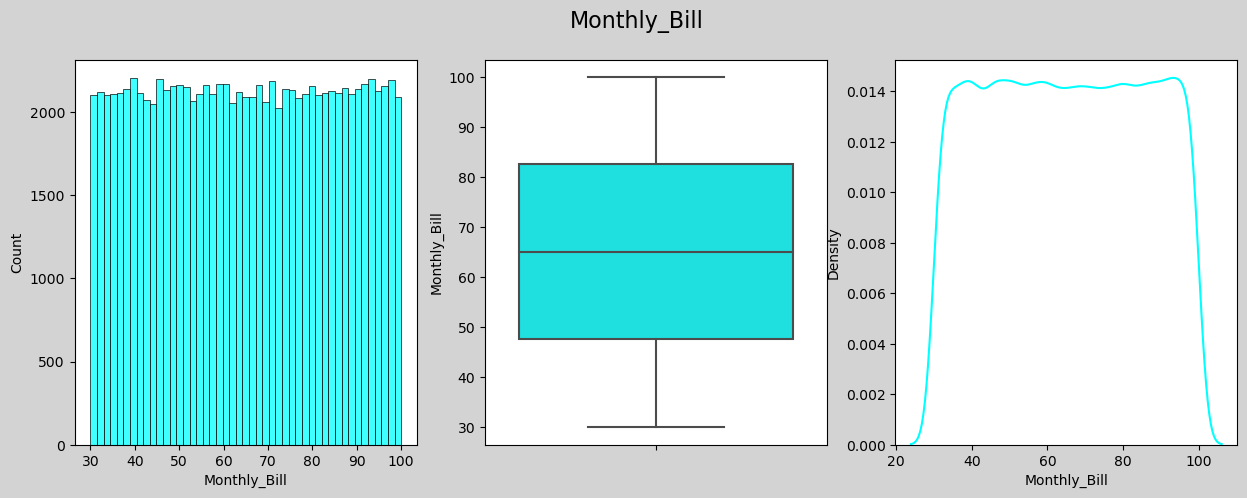

In [33]:
ploting_numerical_features(df,'Monthly_Bill','cyan')    

In [34]:
df['Monthly_Bill'].describe()

count    100000.000000
mean         65.053197
std          20.230696
min          30.000000
25%          47.540000
50%          65.010000
75%          82.640000
max         100.000000
Name: Monthly_Bill, dtype: float64

In [35]:
df['Monthly_Bill'].mode()

0    84.37
Name: Monthly_Bill, dtype: float64

* From Above Information We can say that data's are Distributed towards Rightside (Positively Skewed)



* Minimum Monthly bill for Subscriber is around $ 30



* Maximum Monthly bill is around $ 100



* Average Monthly Bill is Around $ 65

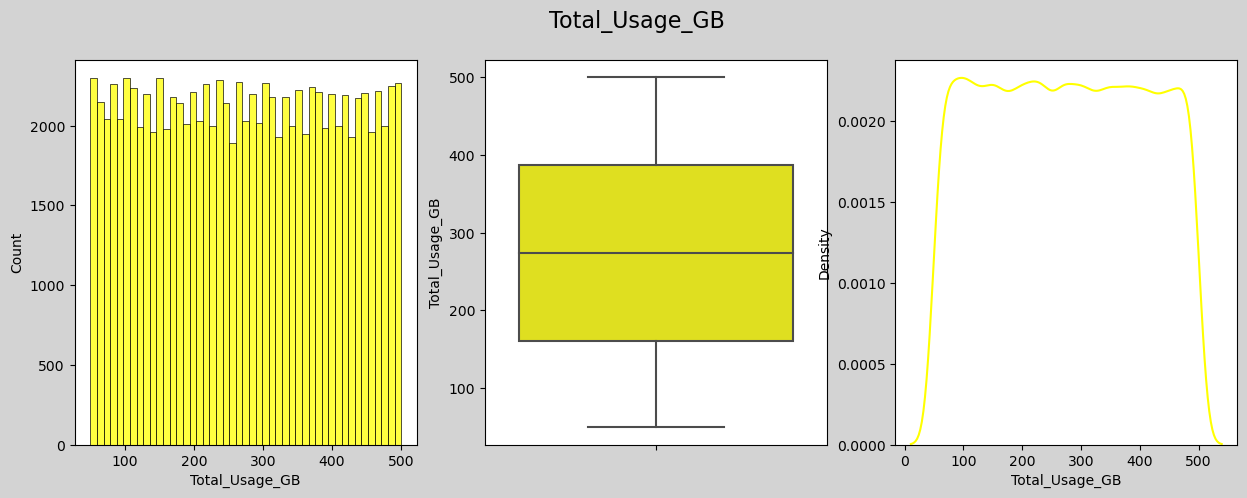

In [36]:
ploting_numerical_features(df,'Total_Usage_GB','yellow')    

In [37]:
df['Total_Usage_GB'].describe()

count    100000.000000
mean        274.393650
std         130.463063
min          50.000000
25%         161.000000
50%         274.000000
75%         387.000000
max         500.000000
Name: Total_Usage_GB, dtype: float64

In [38]:
df['Total_Usage_GB'].mode()

0    72
Name: Total_Usage_GB, dtype: int64

* From Above Information We can say that data's are Distributed towards Rightside (Positively Skewed)



* Minimum Data usage by the Customer is 50 GB


* Maximum Data usage by the Customer is 500 GB



* Average Data usage by the Customer is 275 GB

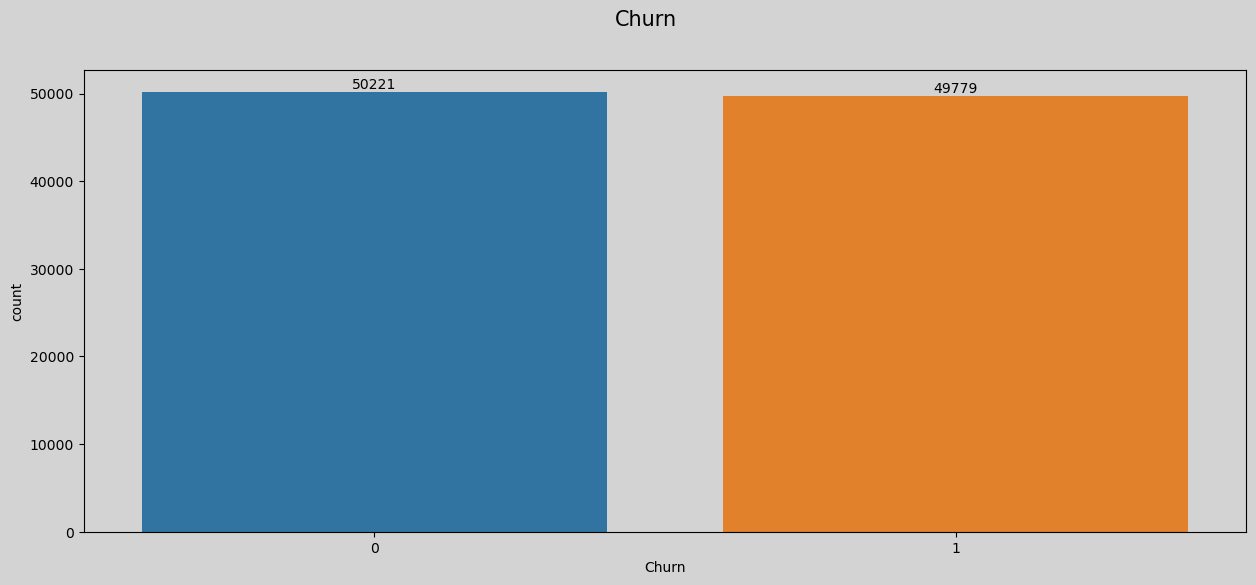

In [39]:
# plotting with target feature

countplot_CV(df,'Churn')

In [40]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

* there are around 50221 not churned Customers and 49779 Customers are churned almost 50 percentage of Customers are Churned 

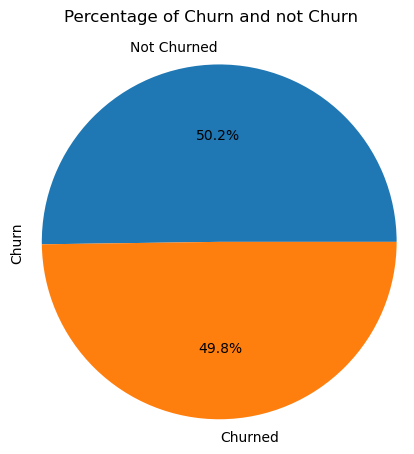

In [41]:
plt.suptitle('Percentage of Churn and not Churn')
df.groupby('Churn')['Churn'].count().plot.pie(autopct="%1.1f%%",radius=1.2,labels=['Not Churned','Churned']);

In [42]:
l1 = df.loc[df['Churn']== 1].count()[0]
print(f"Pecentage of Left: {l1/len(df['Churn'])}")
print(df.Churn.value_counts())

Pecentage of Left: 0.49779
0    50221
1    49779
Name: Churn, dtype: int64


* Almost 50 percentage of Customers are Churned

In [43]:
### How many amount loss from customer churn
loss = []
for values in df.loc[df['Churn'] == 1, 'Monthly_Bill']:
    value = float(values)
    loss.append(value)
print(np.round(sum(loss)))

3238069.0


* We have lost arround $3238069 due to customer churn

# Bivariant Analysis

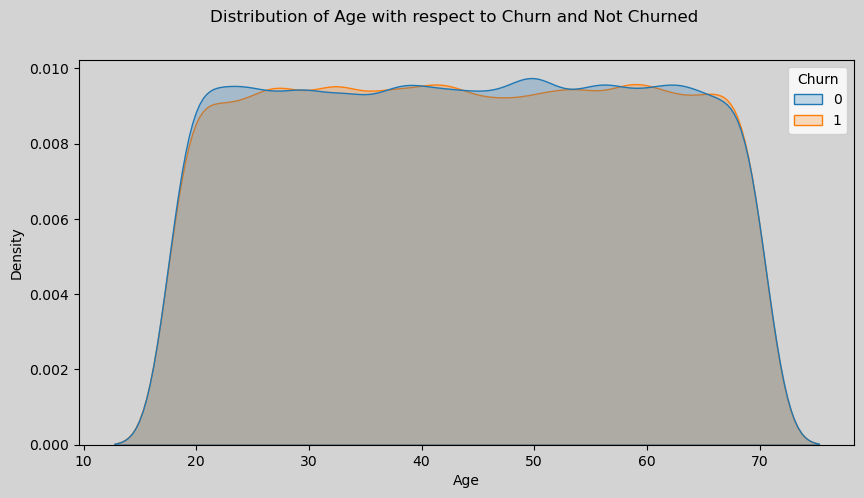

In [44]:
plt.figure(figsize=(10,5),facecolor='lightgrey')
plt.suptitle('Distribution of Age with respect to Churn and Not Churned')
a=plt.axes()
axes=a.set_facecolor('lightgrey')
sns.kdeplot(data=df,x='Age',hue='Churn',fill=True,legend=['not Churnd','churned'],ax=axes);

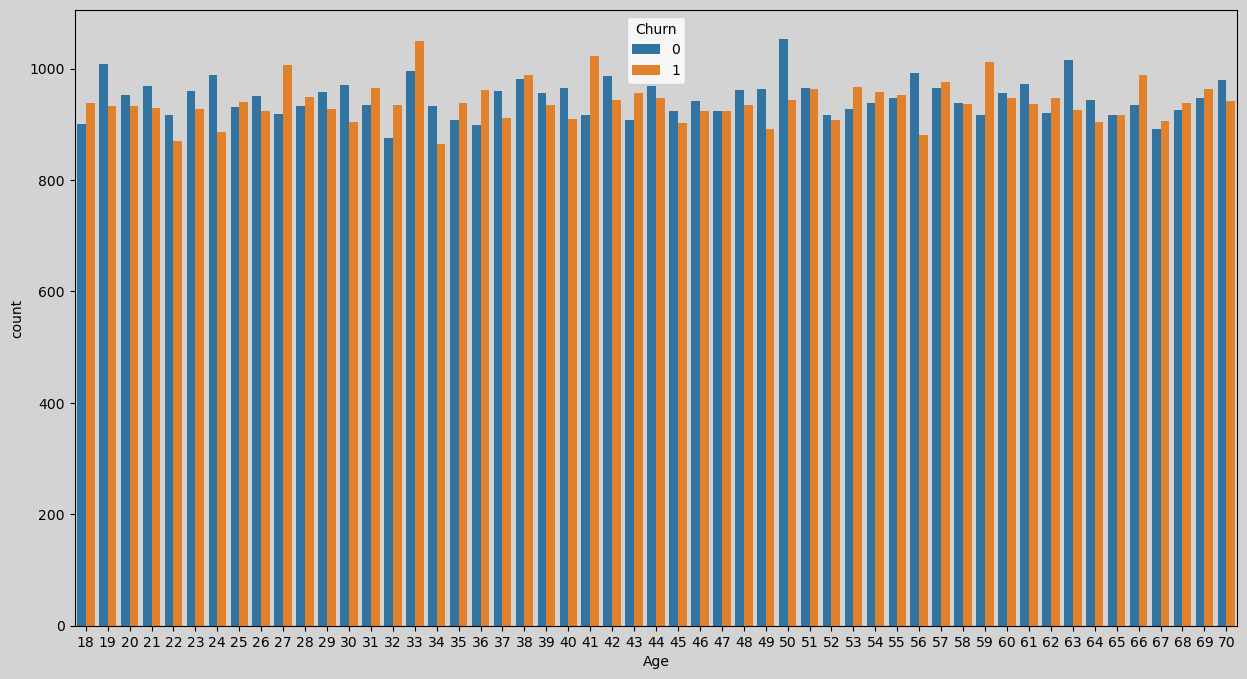

In [45]:
plt.figure(figsize=(15,8),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
sns.countplot(x="Age", hue="Churn", data=df,ax=ax)
plt.show()

* Customers Who's Age is 19 are more are has less Churn Rate

<AxesSubplot:xlabel='Subscription_Length_Months', ylabel='Density'>

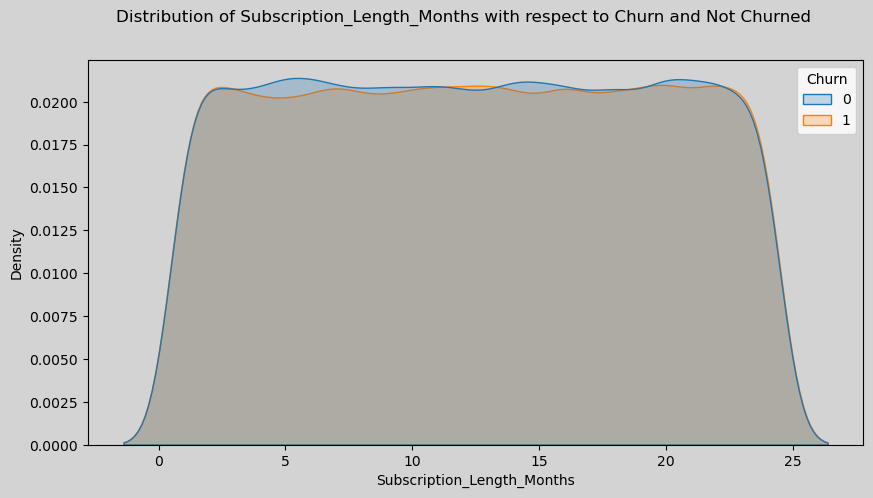

In [46]:
plt.figure(figsize=(10,5),facecolor='lightgrey')
plt.suptitle('Distribution of Subscription_Length_Months with respect to Churn and Not Churned')
a=plt.axes()
axes=a.set_facecolor('lightgrey')
sns.kdeplot(data=df,x='Subscription_Length_Months',hue='Churn',fill=True,legend=['not Churnd','churned'],ax=axes)

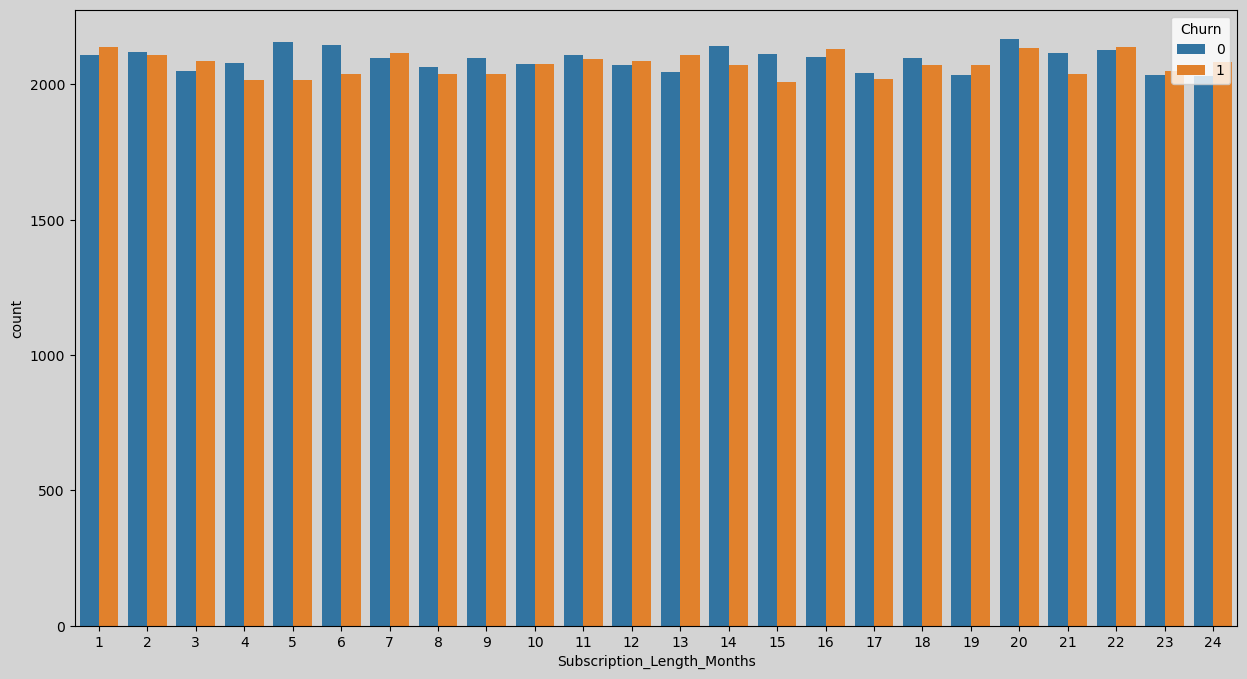

In [47]:
plt.figure(figsize=(15,8),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
sns.countplot(x="Subscription_Length_Months", hue="Churn", data=df,ax=ax)
plt.show()

* During First And Last months Churn rate is slightly More In between Months as slighly less Churn rate 

<AxesSubplot:xlabel='Monthly_Bill', ylabel='Density'>

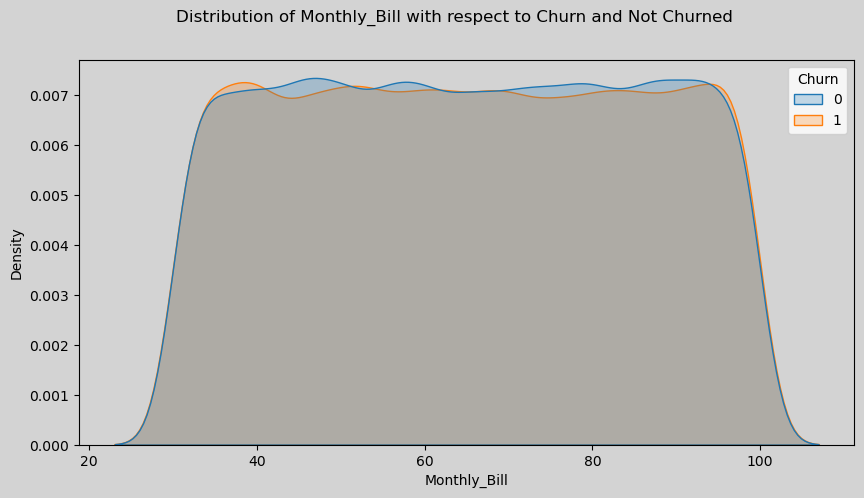

In [48]:
plt.figure(figsize=(10,5),facecolor='lightgrey')
plt.suptitle('Distribution of Monthly_Bill with respect to Churn and Not Churned')
a=plt.axes()
axes=a.set_facecolor('lightgrey')
sns.kdeplot(data=df,x='Monthly_Bill',hue='Churn',fill=True,legend=['not Churnd','churned'],ax=axes)

<AxesSubplot:xlabel='Total_Usage_GB', ylabel='Density'>

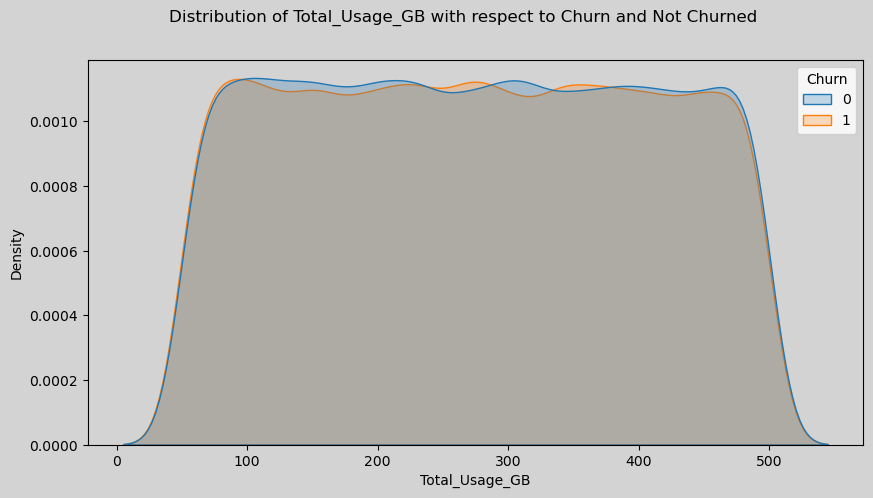

In [49]:
plt.figure(figsize=(10,5),facecolor='lightgrey')
plt.suptitle('Distribution of Total_Usage_GB with respect to Churn and Not Churned')
a=plt.axes()
axes=a.set_facecolor('lightgrey')
sns.kdeplot(data=df,x='Total_Usage_GB',hue='Churn',fill=True,legend=['not Churnd','churned'],ax=axes)

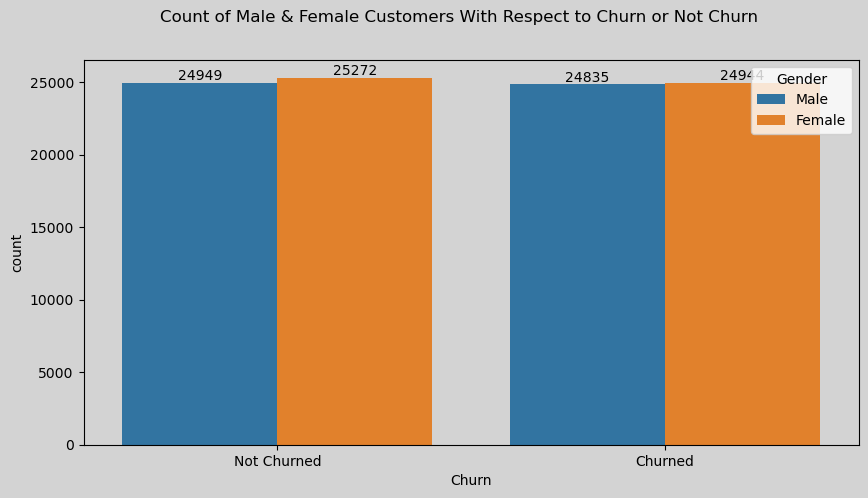

In [50]:
plt.figure(figsize=(10,5),facecolor='lightgrey')
plt.suptitle('Count of Male & Female Customers With Respect to Churn or Not Churn')
a=plt.axes()
axes=a.set_facecolor('lightgrey')
c=sns.countplot(data=df,x='Churn',hue='Gender')
new_label=['Not Churned','Churned']
c.set_xticklabels(new_label)
for label in a.containers:
    a.bar_label(label)
plt.show()

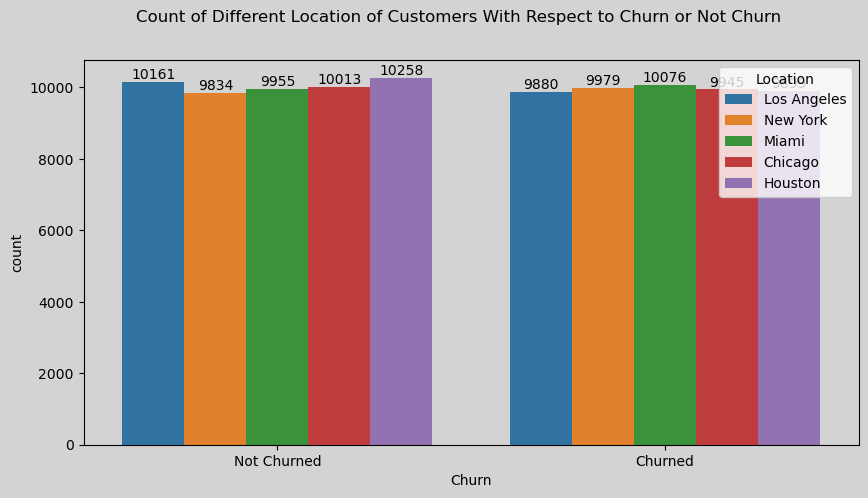

In [51]:
plt.figure(figsize=(10,5),facecolor='lightgrey')
plt.suptitle('Count of Different Location of Customers With Respect to Churn or Not Churn')
a=plt.axes()
axes=a.set_facecolor('lightgrey')
c=sns.countplot(data=df,x='Churn',hue='Location')
new_label=['Not Churned','Churned']
c.set_xticklabels(new_label)
for label in a.containers:
    a.bar_label(label)
plt.show()

* Houston as most number of Not Churn Customers then other Location's


* Miami as most number of Churn Customers compared to other Countries

In [52]:
def stack_plot(df, group, target):
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["darkgreen", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

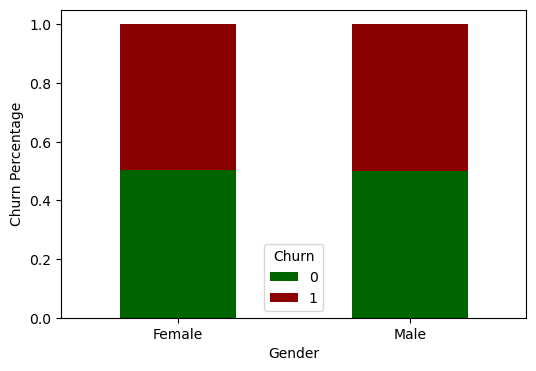

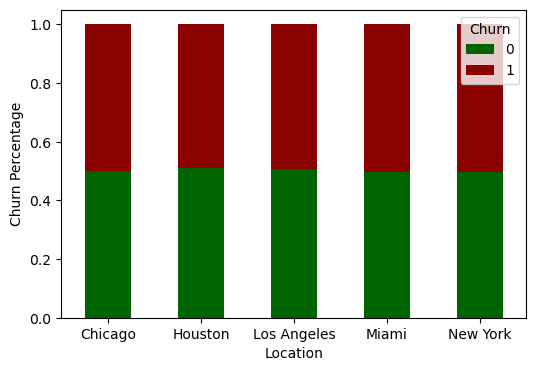

In [53]:
stack_plot(df,'Gender','Churn')
stack_plot(df,'Location','Churn')

* Gender and Location Variables are not helping me to predict Customer Churn

# Ploting Pairplot

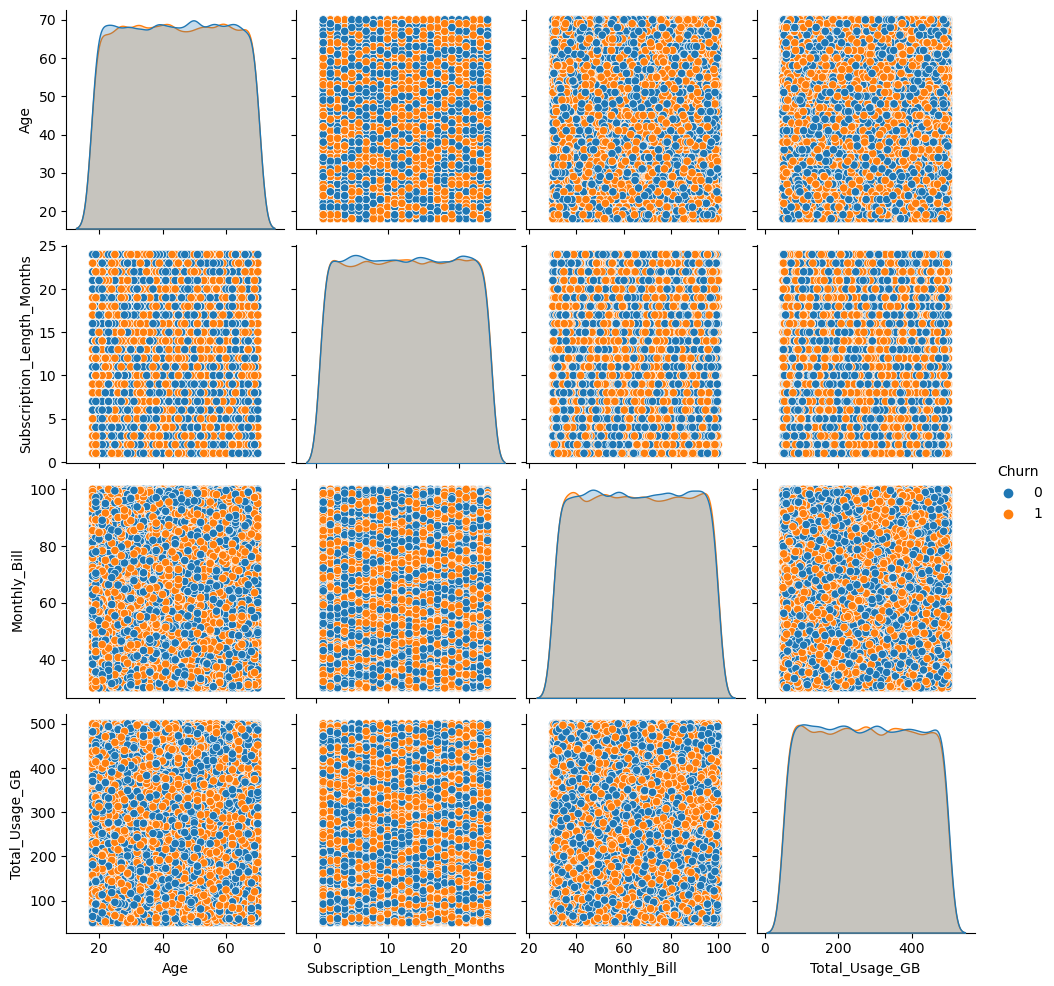

In [54]:
sns.pairplot(df.drop(columns=['Name','CustomerID']),hue='Churn', kind='scatter')
plt.show()

In [55]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


* CustomerId is in Sequence so i am using it as index

In [56]:
df=df.set_index('CustomerID')
df.head()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,,,,,,,,
1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
2,Customer_2,62,Female,New York,1,48.76,172,0
3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
4,Customer_4,36,Female,Miami,3,97.94,297,1
5,Customer_5,46,Female,Miami,19,58.14,266,0


In [57]:
df['Name'].value_counts()

Customer_1         1
Customer_66651     1
Customer_66673     1
Customer_66672     1
Customer_66671     1
                  ..
Customer_33332     1
Customer_33331     1
Customer_33330     1
Customer_33329     1
Customer_100000    1
Name: Name, Length: 100000, dtype: int64

* From Above We can Find the Name Column which is Unique so it Doesn't make any changes in Prediciton So i am Droping Name feature

In [58]:
#Droping the Name Variable

df=df.drop('Name',axis=1)
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,,,,,,,
1,63,Male,Los Angeles,17,73.36,236,0
2,62,Female,New York,1,48.76,172,0
3,24,Female,Los Angeles,5,85.47,460,0
4,36,Female,Miami,3,97.94,297,1
5,46,Female,Miami,19,58.14,266,0


# Converting Categorical Variables to Numerical Variables

In [59]:
#Convert Gender and Location Categorical variables to Numerical Variables using Label Encoder

#importing some Preprocessing lib's
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler

df['Gender']=LabelEncoder().fit_transform(df.Gender)
df['Location']=LabelEncoder().fit_transform(df.Location)

In [60]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,,,,,,,
1,63,1,2,17,73.36,236,0
2,62,0,4,1,48.76,172,0
3,24,0,2,5,85.47,460,0
4,36,0,3,3,97.94,297,1
5,46,0,3,19,58.14,266,0


In [61]:
#Checking the Datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  int32  
 2   Location                    100000 non-null  int32  
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int32(2), int64(4)
memory usage: 5.3 MB


# Box plots to Check whether Outlier's present in the Data sets

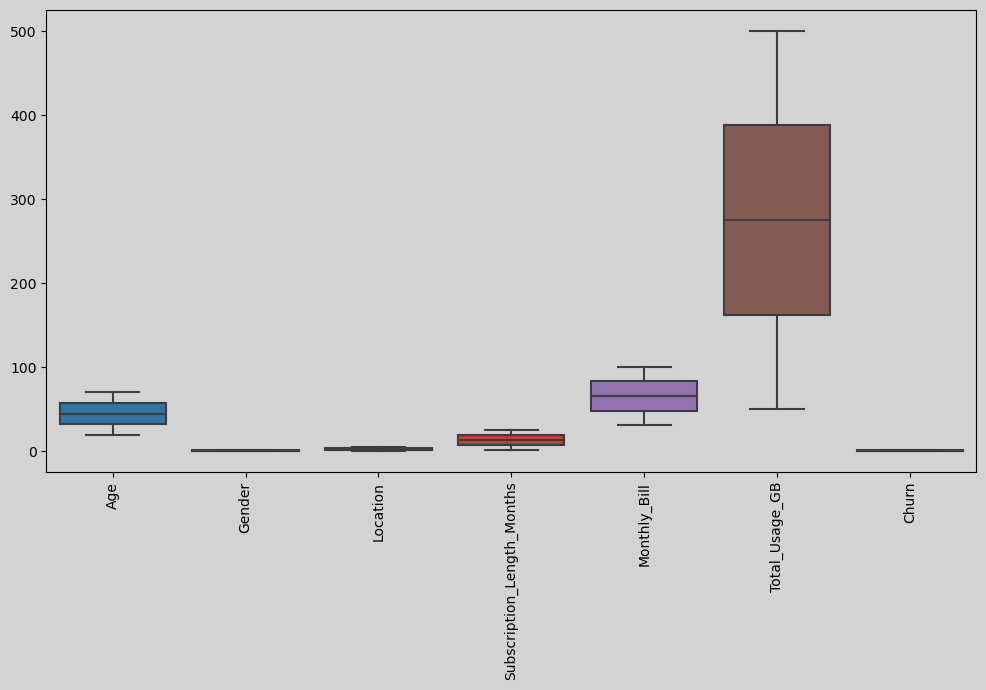

In [62]:
plt.figure(figsize=(12,6),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
sns.boxplot(data=df,ax=ax)
plt.xticks(rotation=90);

* Above plot Shows all variables present in the Dataset as No Outliers 

# Cheking Correlation of variable's

In [63]:
df.corr()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Age,1.000000,0.000832,-0.005889,0.003382,0.001110,0.001927,0.001559
Gender,0.000832,1.000000,-0.003314,0.000320,0.002239,-0.001385,0.002121
Location,-0.005889,-0.003314,1.000000,-0.001768,0.003716,0.002834,0.006405
Subscription_Length_Months,0.003382,0.000320,-0.001768,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001110,0.002239,0.003716,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,0.001927,-0.001385,0.002834,-0.002203,0.003187,1.000000,-0.002842
Churn,0.001559,0.002121,0.006405,0.002328,-0.000211,-0.002842,1.000000


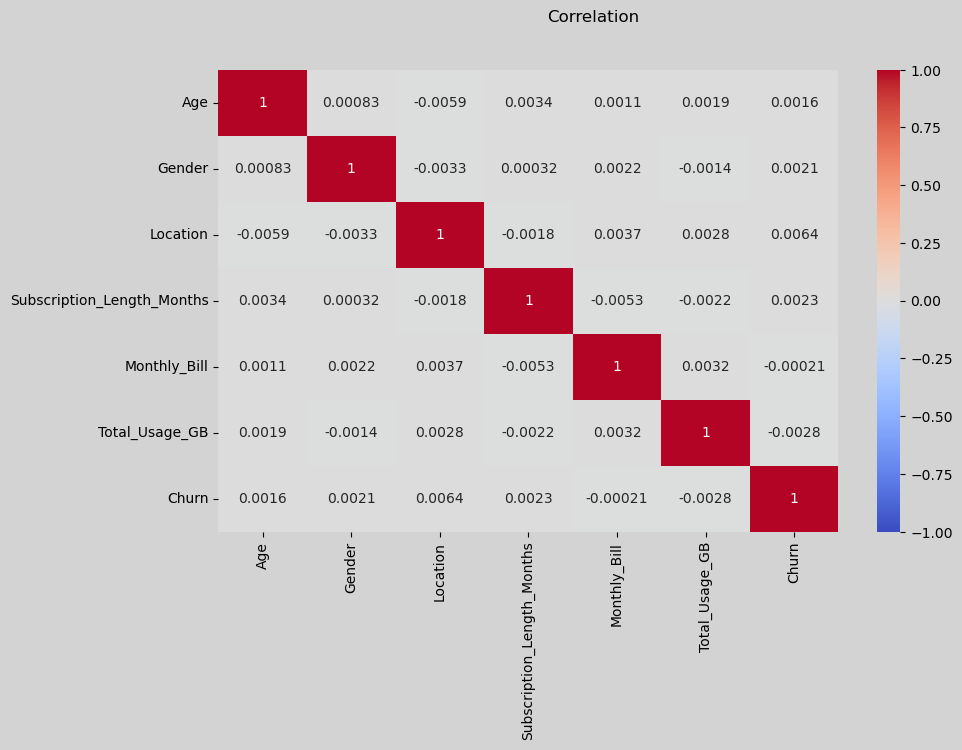

In [64]:
#ploting heatmap

plt.figure(figsize=(10,6),facecolor='lightgrey')
plt.suptitle('Correlation')
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');

# Feature Selection

# Recursive Feature Elimination

In [65]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
CustomerID,,,,,,
1,63,1,2,17,73.36,236
2,62,0,4,1,48.76,172
3,24,0,2,5,85.47,460
4,36,0,3,3,97.94,297
5,46,0,3,19,58.14,266
...,...,...,...,...,...,...
99996,33,1,1,23,55.13,226
99997,62,0,4,19,61.65,351
99998,64,1,0,17,96.11,251


In [66]:
##Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(x,y)
print(fit.ranking_)

[4 1 1 1 2 3]


Recursive Feature Elimination

* Features such as Gender,Location and Subscription_Length_Months has high Importance
* other features such as age,monthly bill and Total_Usage_GB as less importance 

In [67]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.18963153 0.03317928 0.04662591 0.17212515 0.31262326 0.24581486]


In [68]:
X = pd.DataFrame(model.feature_importances_).T
X.columns = x.columns
X

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,0.189632,0.033179,0.046626,0.172125,0.312623,0.245815


In [69]:
# Filter columns with non-zero values
non_zero_cols = X.columns[(X != 0).any(axis=0)]
X[non_zero_cols]

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,0.189632,0.033179,0.046626,0.172125,0.312623,0.245815


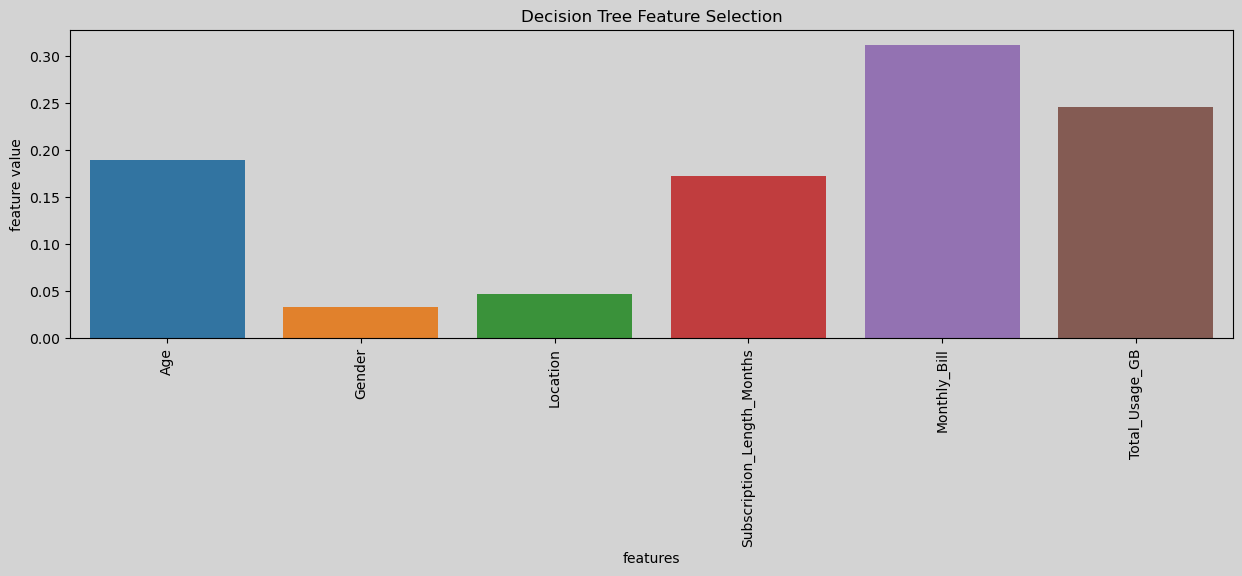

In [70]:
plt.figure(figsize=(15,4), facecolor='lightgray')
ax=plt.axes()
ax.set_facecolor('lightgrey')
sns.barplot(data=X[non_zero_cols])
plt.title('Decision Tree Feature Selection')
plt.xlabel('features')
plt.ylabel('feature value')
plt.xticks(rotation=90)
plt.show()

* Features Such as Monthly bill,Total_usage_gb,Subscription_length_months and age as more Importance 

# Univariate Feature Selection

In [71]:
# Univariate Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import set_printoptions
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(x,y)
set_printoptions(precision=4)
print(fit.scores_)

[1.2887e+00 2.2589e-01 4.0961e+00 2.0821e+00 2.8090e-02 5.0084e+01]


In [72]:
Z = pd.DataFrame(fit.scores_).T
Z.columns=x.columns
Z

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1.2887,0.225892,4.096138,2.082135,0.02809,50.084482


In [73]:
# Checking is there any zero value
non_zero_cols = Z.columns[(Z != 0).any(axis=0)]
Z[non_zero_cols]

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1.2887,0.225892,4.096138,2.082135,0.02809,50.084482


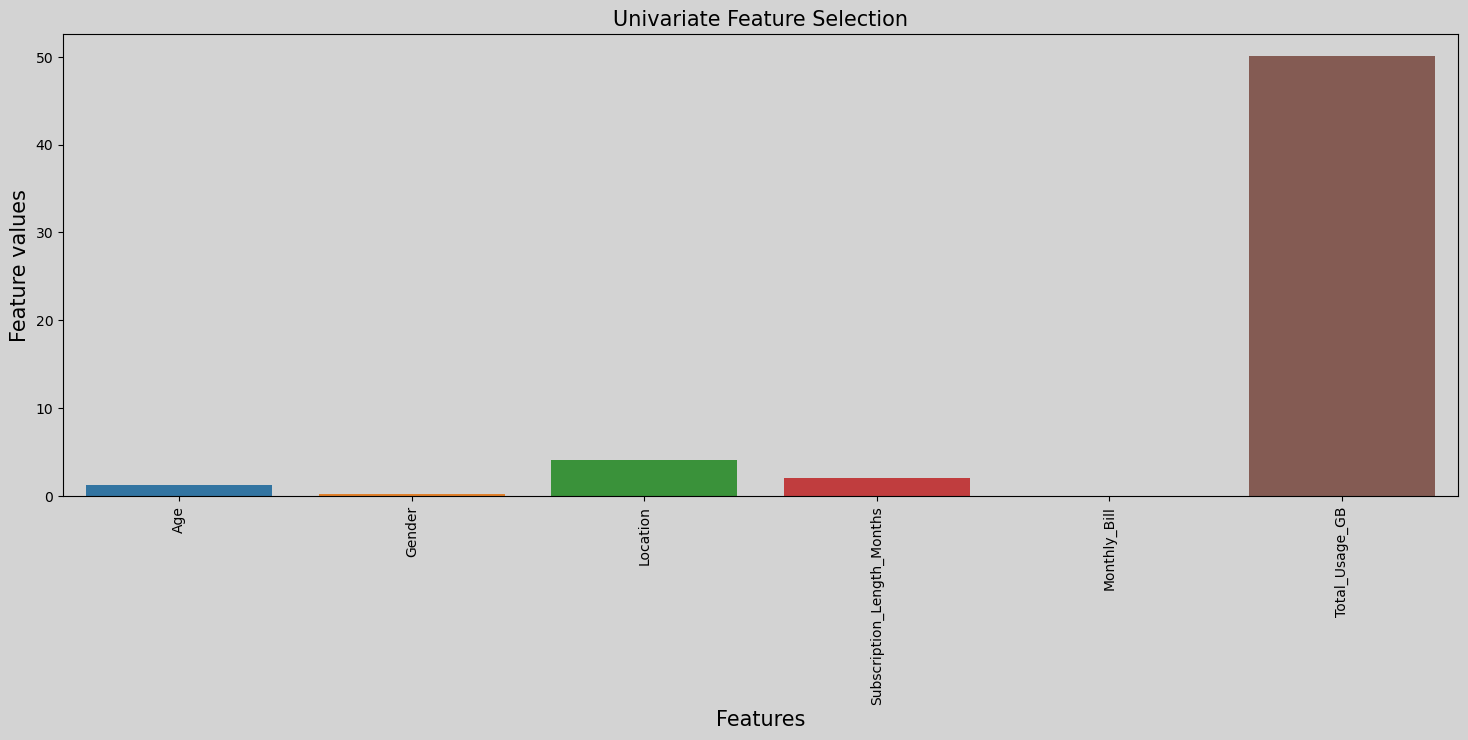

In [74]:
plt.figure(figsize=(18,6), facecolor='lightgrey')

ax=plt.axes()
ax.set_facecolor('lightgrey')
sns.barplot(data=Z)
plt.title('Univariate Feature Selection', size=15)
plt.xlabel('Features', size=15)
plt.ylabel('Feature values',size=15)
plt.xticks(rotation=90)
plt.show()

* Features such as Total_usage_gb ,subscription_months and Location as more importance

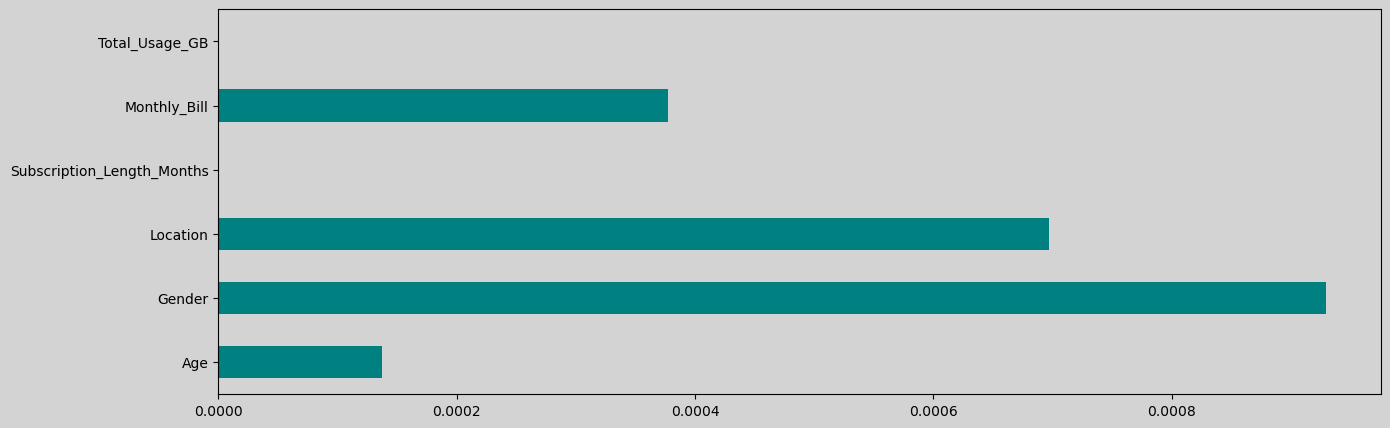

In [75]:
from sklearn.feature_selection import mutual_info_classif

plt.figure(figsize=(15,5),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
importance=mutual_info_classif(x,y)
feat_imp=pd.Series(importance,df.columns[0:len(df.columns)-1])
feat_imp.plot(kind='barh',color='teal')
plt.show()

* Features Such as Gender,Location,monthly bill and Total_usage_gb as more importance 

# Train Test Split

In [84]:
#train test split
from sklearn.model_selection import train_test_split #importing Train test 

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
#test size would be 20% ie. around 2 lakh records

print(f'Size of training data : {X_train.shape}')
x_train=x
print(f'Size of testing data : {X_test.shape}')
Y_train=y

Size of training data : (70000, 6)
Size of testing data : (30000, 6)


In [77]:
#Data Scaling using Minmax Scaler

X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)


# Model Building

# Logistic Regression

In [85]:
#let me Consider all Features for Model Building
from sklearn.linear_model import LogisticRegression # importing the LR algorithm

LRM = LogisticRegression(C= 0.1, penalty='l2', solver = 'liblinear')
LRM.fit(x_train,Y_train)#fitting the train data

LogisticRegression(C=0.1, solver='liblinear')

In [86]:
# predicting the test set using the model which was built

y_pred_LRM = LRM.predict(X_test)
y_pred_LRM

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

# Model Evaluation

In [87]:
# Model Evaluation

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix #importing Some Evaluating Metrics

print(classification_report(y_test,y_pred_LRM))

              precision    recall  f1-score   support

           0       0.51      0.69      0.59     15081
           1       0.50      0.31      0.39     14919

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



In [125]:
lr=accuracy_score(y_test,y_pred_LRM)
lr

0.5048

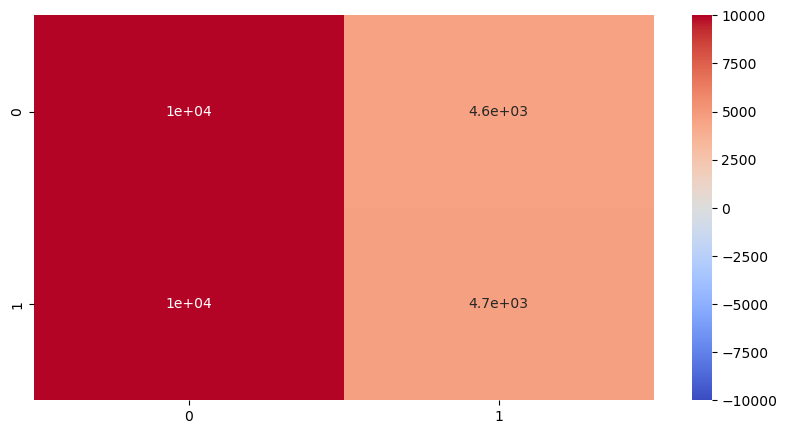

In [90]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred_LRM),vmin = -10000, vmax = +10000, annot = True, cmap = 'coolwarm');

* Logistic Regression Model Which was Build to Classify its not predecting the classes correctly so let me Try other model's

# Hyper parameter tuning

In [ ]:
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

#parameters
param_grid={'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1],'solver':['liblinear','saga']}

# define model
model = LogisticRegression()


grid_search=GridSearchCV(model,param_grid,cv=5)

grid_search.fit(x, y)

print('Best parameters:',grid_search.best_params_)

score=grid_search.score(X_test,y_test)

print('test score :',score)

* Even After Hyperparamter tuning Logistic regression model is not performing well

# Decision Tree Classifier

In [92]:
#builing DecisionTreeClassifier model

DTC = DecisionTreeClassifier(criterion= 'entropy', max_depth = 15, min_samples_leaf= 4, min_samples_split = 2)

DTC.fit(x_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4)

In [93]:
#Predicting the test Data

y_pred_DTC=DTC.predict(X_test)
y_pred_DTC

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [94]:
# Model Evaluation

print(classification_report(y_test,y_pred_DTC))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54     15081
           1       0.55      0.58      0.57     14919

    accuracy                           0.56     30000
   macro avg       0.56      0.56      0.56     30000
weighted avg       0.56      0.56      0.56     30000



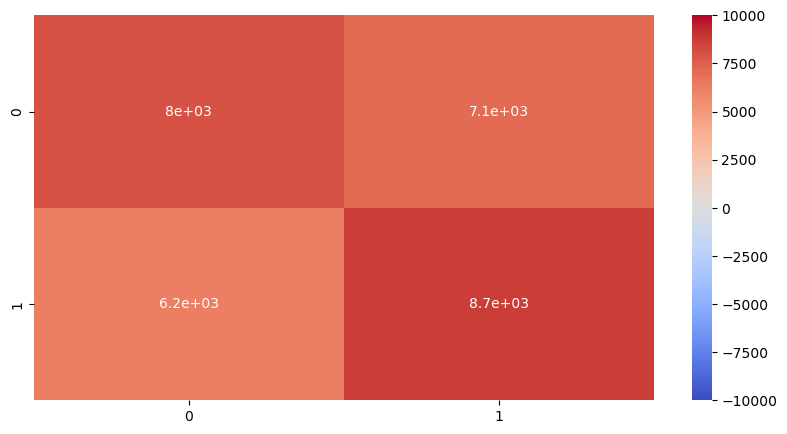

In [96]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred_DTC),vmin = -10000, vmax = +10000, annot = True, cmap = 'coolwarm');

In [126]:
dt=accuracy_score(y_test,y_pred_DTC)
dt

0.5558333333333333

# Hyper parameter tuning

In [ ]:
param_grid={'criterion':['gini','entropy'],'max_depth':[5,10,15],'min_samples_split':[2,5,6],'min_samples_leaf':[1,2,4]}

model=DecisionTreeClassifier()
grid_search=GridSearchCV(model,param_grid,cv=5)

grid_search.fit(X_train, y_train)

print('Best parameters:',grid_search.best_params_)

score=grid_search.score(X_test,y_test)

print('test score :',score)


# Random Forest Classifier

In [98]:
#builing Random Forest model
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=500,max_depth=15,min_samples_split=5)

RFC.fit(x_train,Y_train)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=500)

In [99]:
#Predicting the test Data

y_pred_RFC=RFC.predict(X_test)
y_pred_RFC

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [100]:
# Model Evaluation

print(classification_report(y_test,y_pred_RFC))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     15081
           1       0.93      0.84      0.88     14919

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000



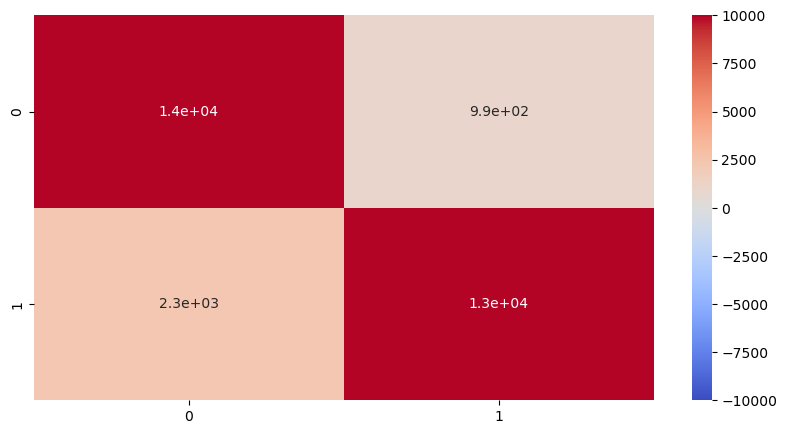

In [101]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred_RFC),vmin = -10000, vmax = +10000, annot = True, cmap = 'coolwarm');

In [127]:
rfc=accuracy_score(y_test,y_pred_RFC)
rfc

0.8894666666666666

# Hyper parameter tuning

In [ ]:
param_grid={'n_estimators':[100],'max_depth':[10,15],'min_samples_split':[2]}
model=RandomForestClassifier()

grid_search=GridSearchCV(model,param_grid,cv=5)

grid_search.fit(X_train, y_train)

print('Best parameters:',grid_search.best_params_)

score=grid_search.score(X_test,y_test)

print('test score :',score)


# XG Boost Classifier

In [103]:
#builing Random Forest model

from xgboost import XGBClassifier 

XGB = XGBClassifier(n_estimators=500,learning_rate=0.1,max_depth=5,gamma=0.9)

XGB.fit(x_train,Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.9, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [104]:
#Predicting the test Data

y_pred_XGB=XGB.predict(X_test)
y_pred_XGB

array([0, 1, 1, ..., 0, 0, 0])

In [105]:
# Model Evaluation

print(classification_report(y_test,y_pred_XGB))

              precision    recall  f1-score   support

           0       0.64      0.67      0.66     15081
           1       0.65      0.62      0.63     14919

    accuracy                           0.65     30000
   macro avg       0.65      0.65      0.65     30000
weighted avg       0.65      0.65      0.65     30000



In [128]:
xg=accuracy_score(y_test,y_pred_XGB)
xg

0.6454

# Hyper parameter tuning

In [ ]:
param_grid={'n_estimators':[100,500],'learning_rate':[0.01,0.1],'max_depth':[5,10],'gamma':[0.1,0.2],'reg_alpha':[0.1,0.5],'reg_lambda':[0.1,0.5],'subsample':[0.5,1],'colsample_bytree':[0.5,1],'eval_metric':['logloss']}

grid_search=GridSearchCV(model,param_grid,cv=5)

grid_search.fit(X_train, y_train)

print('Best parameters:',grid_search.best_params_)

score=grid_search.score(X_test,y_test)

print('test score :',score)

# Gradient Boosting Classifier

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

GBC=GradientBoostingClassifier()

GBC.fit(x_train,Y_train)

GradientBoostingClassifier()

In [107]:
#Predicting the test Data

y_pred_GBC=GBC.predict(X_test)
y_pred_GBC

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [108]:
# Model Evaluation

print(classification_report(y_test,y_pred_GBC))

              precision    recall  f1-score   support

           0       0.53      0.64      0.58     15081
           1       0.54      0.43      0.48     14919

    accuracy                           0.54     30000
   macro avg       0.54      0.53      0.53     30000
weighted avg       0.54      0.54      0.53     30000



In [129]:
gb=accuracy_score(y_test,y_pred_GBC)
gb

0.5352333333333333

# Hyper parameter tuning

In [ ]:
model=GradientBoostingClassifier()

param_grid={'n_estimators':[100,500,1000],'learning_rate':[0.01,0.1,1],'max_depth':[3,5,7],'subsample':[0.5,0.7,1],',min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'max_features':['sqrt','log2']}

grid_search=GridSearchCV(model,param_grid,cv=5)

grid_search.fit(X_resampled, y_resampled)

print('Best parameters:',grid_search.best_params_)

score=grid_search.score(X_test,y_test)

print('test score :',score)

In [111]:
y.value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [145]:
pd.DataFrame({'Model':['Logistic_Regression','Decision Tree classifier','Random Forest Classifier','XG_Boost','Gradient Boost'],'Accuracy':[lr,dt,rfc,xg,gb]}).sort_values('Accuracy')

,Model,Accuracy
0,Logistic_Regression,0.504800
4,Gradient Boost,0.535233
1,Decision Tree classifier,0.555833
3,XG_Boost,0.645400
2,Random Forest Classifier,0.889467


* Random Forest Classifier model is Predicting the both the classes and there Accuracy is Comparitvely higher then all other models

# Final Model 

In [146]:
#builing Random Forest model
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=500,max_depth=15,min_samples_split=5)

RFC.fit(x_train,Y_train)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=500)

In [147]:
#Predicting the test Data

y_pred_RFC=RFC.predict(X_test)
y_pred_RFC

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [148]:
# Model Evaluation

print(classification_report(y_test,y_pred_RFC))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     15081
           1       0.92      0.84      0.88     14919

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000



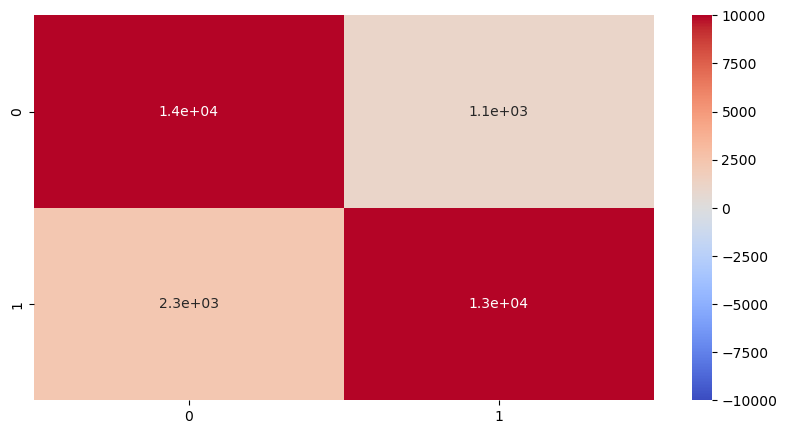

In [149]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred_RFC),vmin = -10000, vmax = +10000, annot = True, cmap = 'coolwarm');

In [163]:
rfc=accuracy_score(y_test,y_pred_RFC)
print(f'Testing Accuracy of Final Model = {np.round(rfc,4)}')

Testing Accuracy of Final Model = 0.8868


In [166]:
#testing accuracy of the model
print(f'Training Accuracy of Final Model = {np.round(accuracy_score(y_train,(RFC.predict(X_train))),4)}')

Training Accuracy of Final Model = 0.8893
